# Vector Derivatives

The principle vector derivatives are the gradient, divergence, and curl.  

## Gradient

The gradient is a vector of the partial derivatives of a scalar function, and is defined as:

$$\nabla f = \frac{\partial f}{\partial x} \hat{x} + \frac{\partial f}{\partial y} \hat{y} + \frac{\partial f}{\partial z} \hat{z}$$

The gradient is a vector, and is the direction of steepest ascent of a scalar function.

## Divergence

The divergence is the dot product of the gradient and a vector function, and is defined as:

$$\nabla \cdot \vec{F} = \frac{\partial F_x}{\partial x} + \frac{\partial F_y}{\partial y} + \frac{\partial F_z}{\partial z}$$

The divergence is a scalar, and is the amount of flux per unit volume leaving a point.

## Curl

The curl is the cross product of the gradient and a vector function, and is defined as:

$$\nabla \times \vec{F} = \left( \frac{\partial F_z}{\partial y} - \frac{\partial F_y}{\partial z} \right) \hat{x} + \left( \frac{\partial F_x}{\partial z} - \frac{\partial F_z}{\partial x} \right) \hat{y} + \left( \frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} \right) \hat{z}$$  

The curl is a vector, and is the direction of the axis of rotation of a vector function.

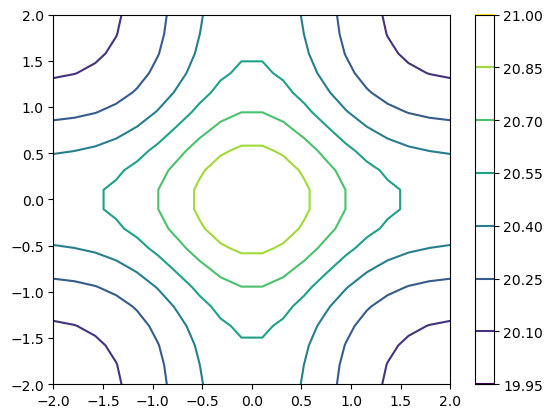

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook

# Create a scalar field
def T(x,y,z):
    return 20 + 0.5*np.exp(-x**2) + 0.5*np.exp(-y**2)

# Create a grid of points in the x-y plane
x = np.linspace(-2,2,20)
y = np.linspace(-2,2,20)

# Create a meshgrid
X,Y = np.meshgrid(x,y)

# Evaluate the scalar field at the grid points
T = T(X,Y,0)

# Create a contour plot
plt.contour(X,Y,T)
plt.colorbar()
plt.show()

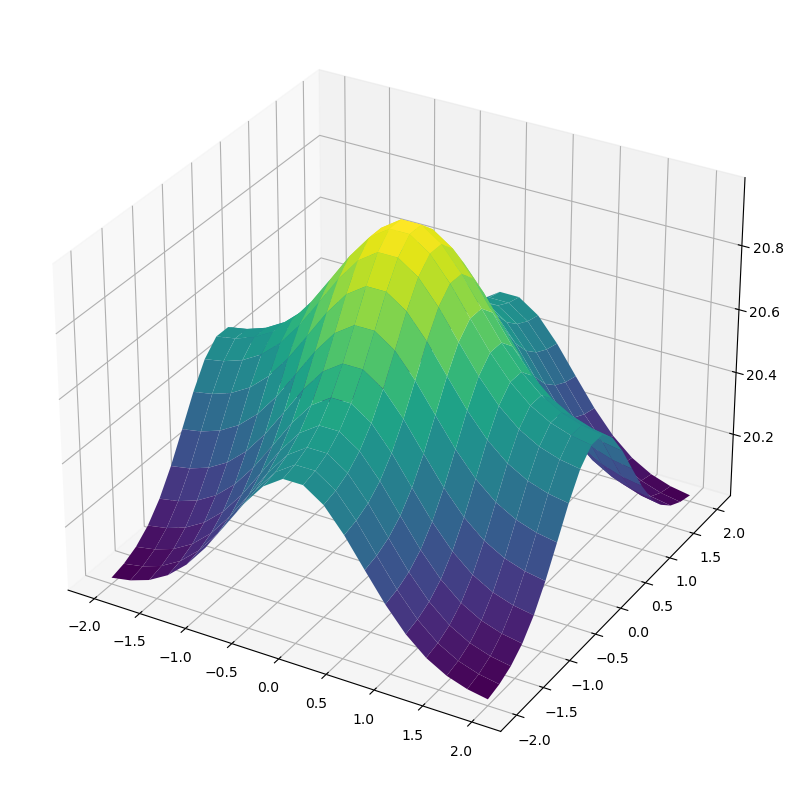

In [2]:
# Create a 3D plot of the scalar field
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,T, cmap='viridis')

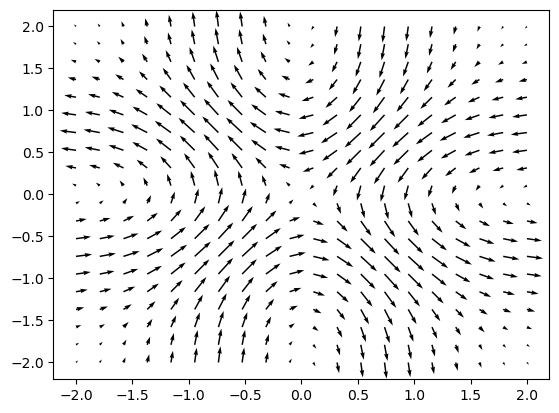

In [3]:
# Calculate the gradient of the scalar field
Tgrad = np.gradient(T)

# Make a quiver plot of the gradient
plt.quiver(X,Y,Tgrad[0],Tgrad[1])

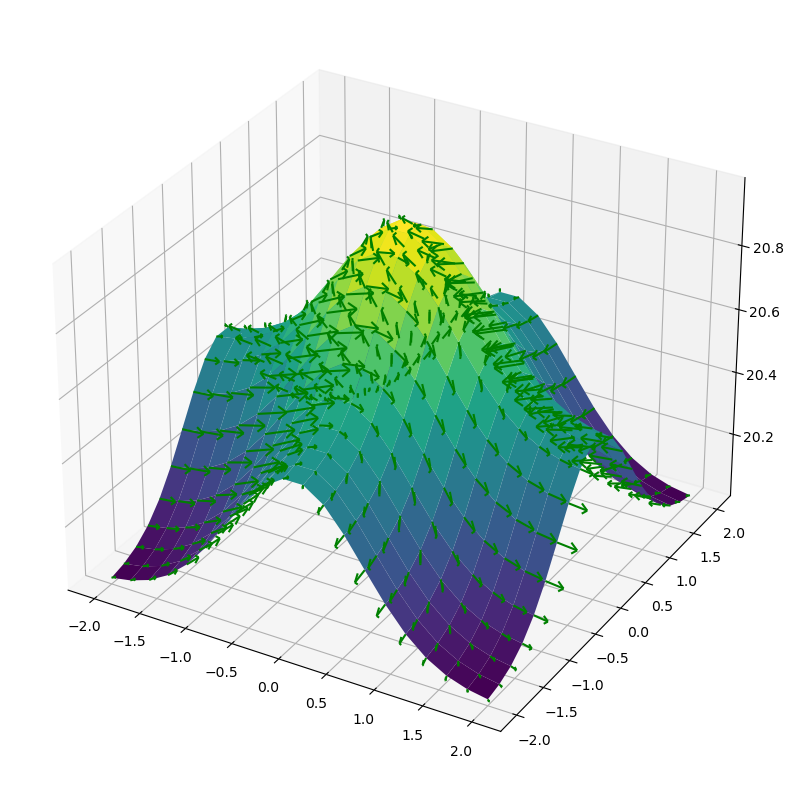

In [4]:
# Create a 3D plot of the gradient

# Plot the scalar field
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,T, cmap='viridis')

# Plot the gradient
ax.quiver(X,Y,T,Tgrad[0],Tgrad[1],0, color='g',length=2.5)



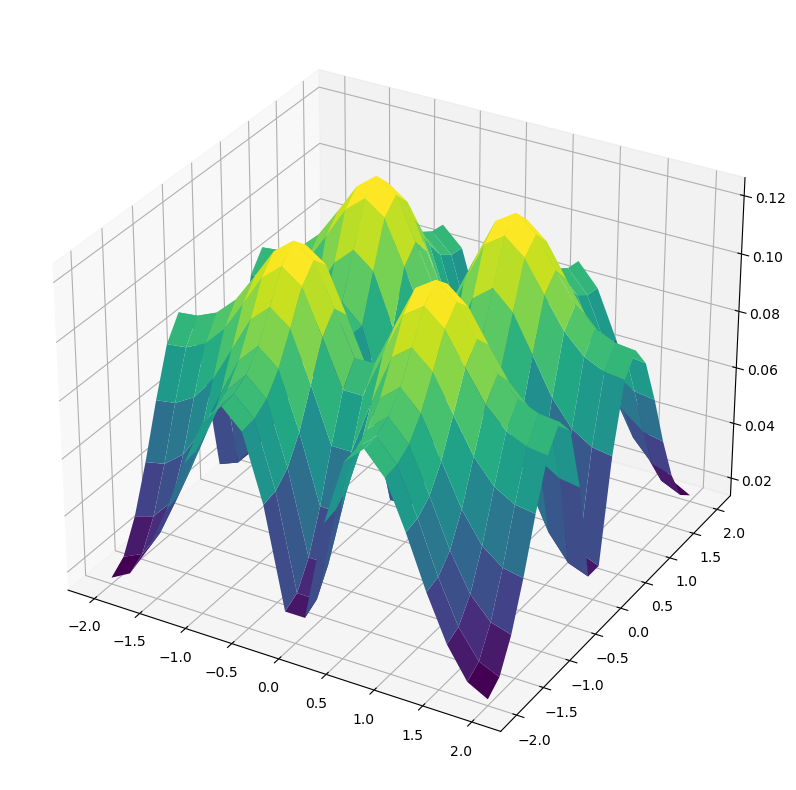

In [5]:
# Create a 3D plot of the size of the gradient

# Calculate the magnitude of the gradient
Tgradmag = np.sqrt(Tgrad[0]**2 + Tgrad[1]**2)

# Plot the magnitude of the gradient
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Tgradmag, cmap='viridis')

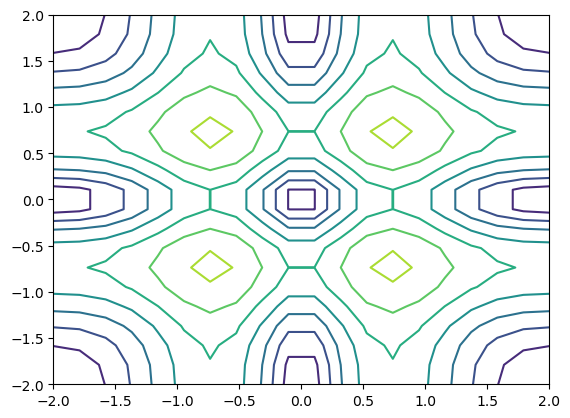

In [6]:
# create a contour plot of the magnitude of the gradient
plt.contour(X,Y,Tgradmag)

# Divergence of Vector Fields

The divergence of a vector field is a scalar field, and is defined as:

$$\nabla \cdot \vec{F} = \frac{\partial F_x}{\partial x} + \frac{\partial F_y}{\partial y} + \frac{\partial F_z}{\partial z}$$

The divergence is the amount of flux per unit volume leaving a point.  If the divergence is positive, then the vector field is expanding from that point.  If the divergence is negative, then the vector field is contracting towards that point.  If the divergence is zero, then the vector field is neither expanding nor contracting at that point.

The divergence of a vector field can be calculated in Python using the `divergence` function from the `numpy` library.  The `divergence` function takes two arguments: the vector field, and the grid spacing.  The vector field is a list of the components of the vector field, and the grid spacing is a list of the grid spacing in each dimension.  The `divergence` function returns a scalar field.

Let's start by creating a vector field in the x-y plane.  We'll use the function $F(x,y) = \left( \cos(x + 2y), \sin(x - 2y) \right)$.

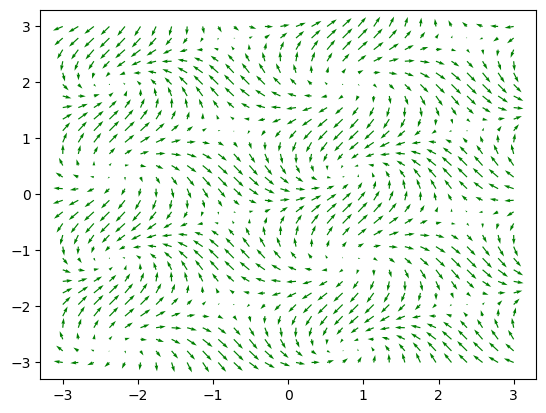

In [7]:
# Create a vector field

# Create a grid of points in the x-y plane
x = np.linspace(-3,3,30)
y = np.linspace(-3,3,30)

# Create a meshgrid
X,Y = np.meshgrid(x,y,indexing = 'ij', sparse = False)

# Create a vector field
def F(x,y):
    return np.array([np.cos(x + 2*y),np.sin(x - 2*y)])

# Evaluate the vector field at the grid points
F = F(X,Y)

# Plot the vector field
plt.quiver(X,Y,F[0],F[1], color='g', scale=50)


## Divergence of a 2D Vector Field

Let's calculate the divergence of the vector field $F(x,y) = \left( \cos(x + 2y), \sin(x - 2y) \right)$.

Analytically, the divergence of $F(x,y)$ is:

$$\nabla \cdot F(x,y) = - \sin(x + 2y) - 2 \cos(x - 2y)$$

Let's calculate the divergence of $F(x,y)$ numerically using a `divergence` function which uses functions from the `numpy` library.

This function takes two arguments: the vector field, and the grid spacing.  The vector field is a list of the components of the vector field, and the grid spacing is a list of the grid spacing in each dimension.  The `divergence` function returns a scalar field.



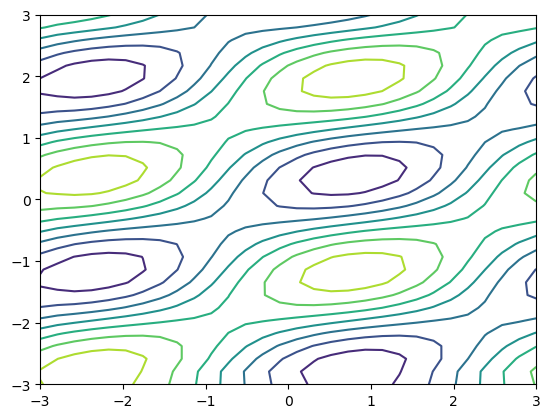

In [8]:
# Calculate the divergence of the vector field
def divergence(f,h):
    """
    div(F) = dFx/dx + dFy/dy + ...
    g = np.gradient(Fx,dx, axis=1)+ np.gradient(Fy,dy, axis=0) #2D
    g = np.gradient(Fx,dx, axis=2)+ np.gradient(Fy,dy, axis=1) +np.gradient(Fz,dz,axis=0) #3D
    """
    num_dims = len(f)
    #print(h[0],h[1])
    #print(f[0][0])
    #print(f[1][0])
    return np.ufunc.reduce(np.add, [np.gradient(f[i], h[i], axis=i) for i in range(num_dims)])

# Calculate the grid spacing
dx = x[1]-x[0]
dy = y[1]-y[0]

# Calculate the divergence
Fdiv = divergence(F,[dx,dy])

# Plot the divergence
plt.contour(X,Y,Fdiv)


Text(0.5, 1.0, 'analytical')

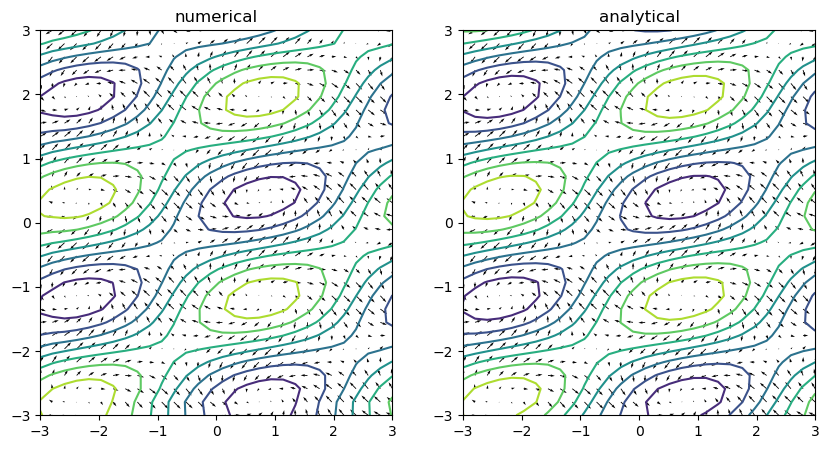

In [9]:
# Let's compare the numerical divergence to the analytical divergence

def divF_theory(x,y):
    return -np.sin(x+2*y) - 2*np.cos(x-2*y)

divFT = divF_theory(X,Y)

# Plot the divergence
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].contour(X,Y,Fdiv)
ax[0].quiver(X,Y,F[0],F[1])
ax[0].set_title('numerical')

ax[1].contour(X,Y,divFT)
ax[1].quiver(X,Y,F[0],F[1])
ax[1].set_title('analytical')


/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_76837/3814444095.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(rows,cols,1,aspect='equal',title='div numerical')


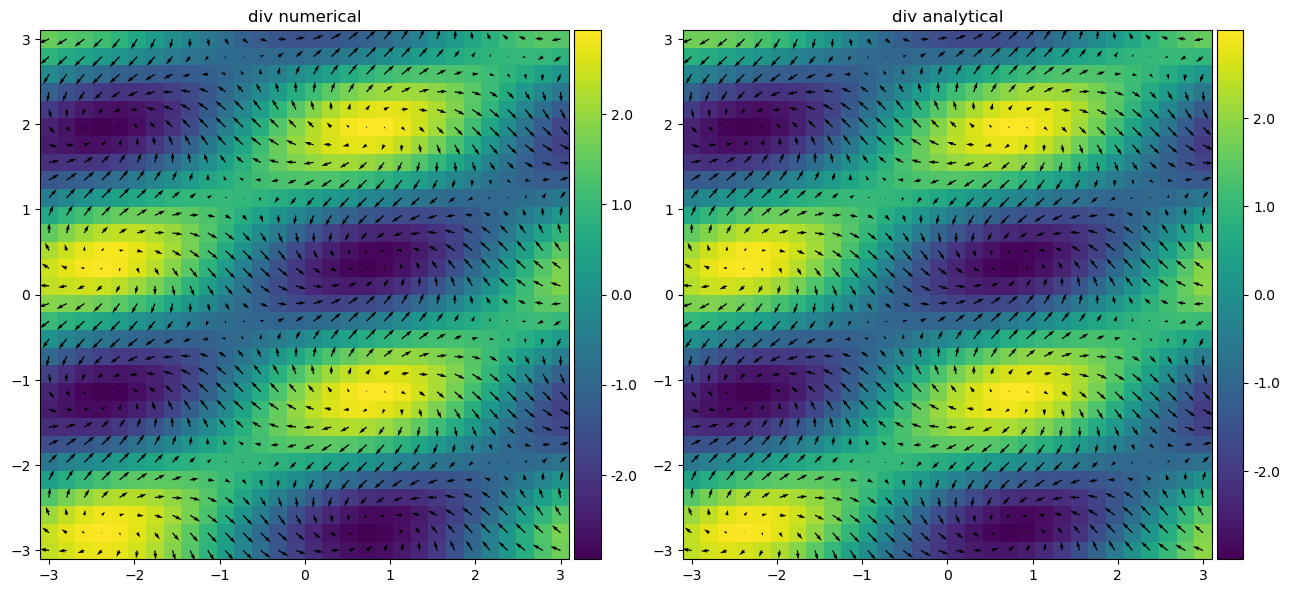

In [10]:
# Here is an alternate way to plot the divergence

from mpl_toolkits.axes_grid1 import make_axes_locatable

rows = 1
cols = 2
#plt.clf()
plt.figure(figsize=(cols*6.5,rows*6.5))
plt.minorticks_on()

ax = plt.subplot(rows,cols,1,aspect='equal',title='div numerical')
im = plt.pcolormesh(X, Y, Fdiv, shading='nearest')
plt.quiver(X,Y,F[0],F[1])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax = cax,format='%.1f')

ax = plt.subplot(rows,cols,2,aspect='equal',title='div analytical')
im = plt.pcolormesh(X, Y, divFT, shading='nearest')
plt.quiver(X,Y,F[0],F[1])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax = cax,format='%.1f')

plt.tight_layout()
plt.show()

## Curl of a 2D Vector Field

The curl of a vector field is a vector field, and is defined as:

$$\nabla \times \vec{F} = \left( \frac{\partial F_z}{\partial y} - \frac{\partial F_y}{\partial z} \right) \hat{x} + \left( \frac{\partial F_x}{\partial z} - \frac{\partial F_z}{\partial x} \right) \hat{y} + \left( \frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} \right) \hat{z}$$

In 2D, the curl of a vector field is:

$$\nabla \times \vec{F} = \left( \frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} \right) \hat{z}$$

The curl is the direction of the axis of rotation of a vector field.  If the curl is zero, then the vector field is irrotational.  If the curl is non-zero, then the vector field is rotational.

We will use the 2D vector field $F(x,y) = \left( \cos(x + 2y), \sin(x - 2y) \right)$ to demonstrate the curl.

Analytically, the curl of $F(x,y)$ is:

$$\nabla \times F(x,y) = 4 \sin(x + 2y) \hat{z}$$

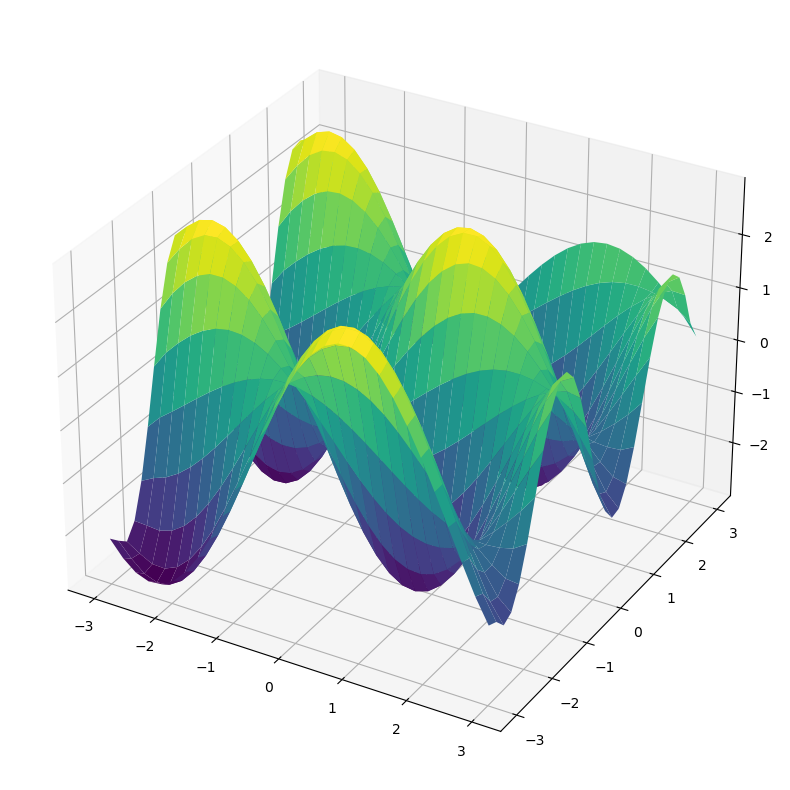

In [11]:
# Calculate the curl of the vector field

def curl(f,h):
    """
    curl(F) = dFy/dx - dFx/dy
    """
    num_dims = len(f)
    return np.gradient(f[1], h[0], axis=0) - np.gradient(f[0], h[1], axis=1)

# Calculate the curl
Fcurl = curl(F,[dx,dy])

# Plot the curl in 3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X,Y,Fcurl, cmap='viridis')


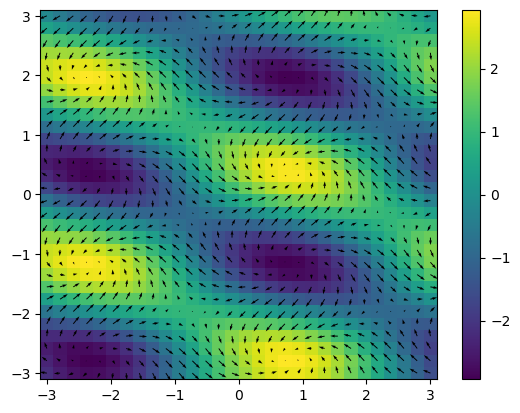

In [12]:
# Plot the curl in 2D

# plot a colorbar based on the magnitude of the curl
im = plt.pcolormesh(X, Y, Fcurl, shading='nearest')
plt.quiver(X,Y,F[0],F[1])
cbar = plt.colorbar(im)